# 1. Sampling and Sampling Distributions
markdown
Copy code

### Key Concepts

1. **Sampling**:
   - The process of selecting a subset (sample) from a larger group (population).
   - Used to estimate population parameters when it is impractical to survey the entire population.

2. **Sampling Distribution**:
   - The distribution of a statistic (e.g., mean, variance) across repeated samples of the same size.
   - Key properties:
     - The mean of the sampling distribution equals the population mean.
     - The variability of the sampling distribution decreases with larger sample sizes.

### Why It Matters:
Sampling distributions allow us to quantify uncertainty in sample statistics.

### Real-World Application:
Estimating the average delivery time for an e-commerce company by analyzing data from a random sample of orders.

### Example:
Simulate a population, take random samples, compute sample means, and visualize the sampling distribution.


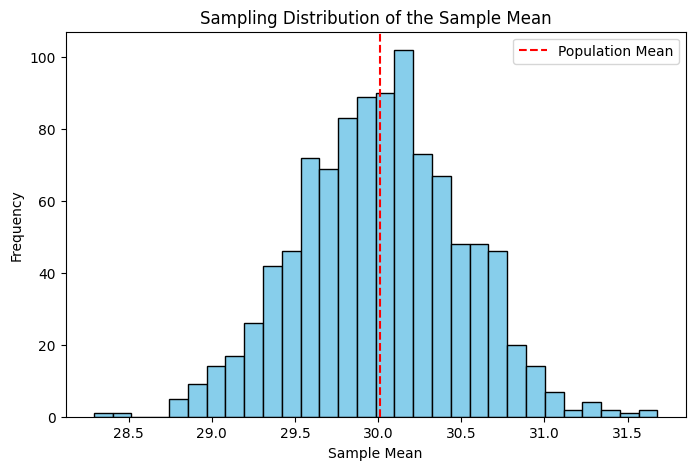

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a population (e.g., delivery times in minutes)
population = np.random.normal(loc=30, scale=5, size=10000)  # Mean=30, SD=5

# Take random samples and compute sample means
sample_means = [np.mean(np.random.choice(population, size=100, replace=False)) for _ in range(1000)]

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(population), color='red', linestyle='--', label="Population Mean")
plt.title("Sampling Distribution of the Sample Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# 2. Central Limit Theorem (CLT)
### Key Concepts

The **Central Limit Theorem (CLT)** states that:
1. The sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's original distribution.
2. The mean of the sampling distribution equals the population mean.
3. The standard deviation of the sampling distribution (standard error) is given by:
   SE = σ / sqrt(n)

### Why It Matters:
The CLT allows us to make inferences about population parameters using normal approximations, even when the underlying population distribution is not normal.

### Real-World Application:
Predicting average sales revenue from daily transaction data.

### Example:
Simulate the CLT with a non-normal population and demonstrate the normality of the sampling distribution.


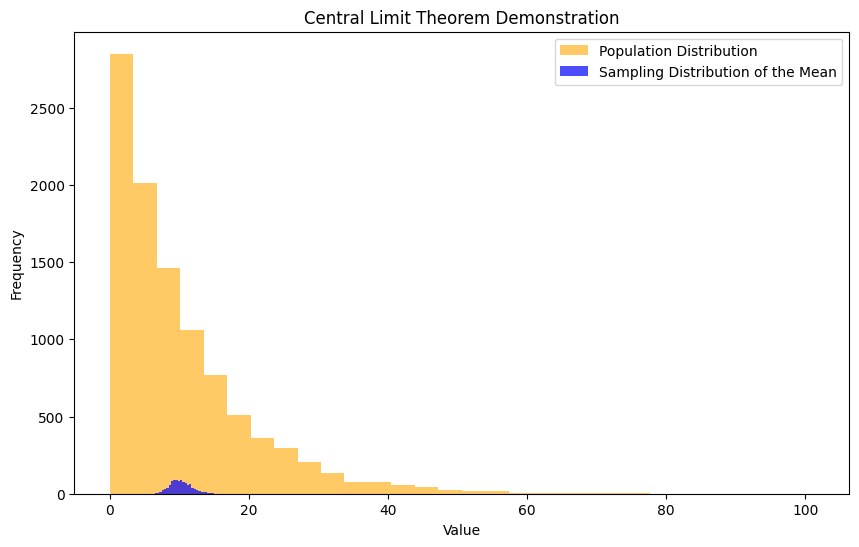

In [2]:
# Simulate a non-normal population (e.g., daily transaction amounts)
non_normal_population = np.random.exponential(scale=10, size=10000)

# Compute sample means
sample_means_clt = [np.mean(np.random.choice(non_normal_population, size=50, replace=False)) for _ in range(1000)]

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(non_normal_population, bins=30, color='orange', alpha=0.6, label="Population Distribution")
plt.hist(sample_means_clt, bins=30, color='blue', alpha=0.7, label="Sampling Distribution of the Mean")
plt.title("Central Limit Theorem Demonstration")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# 3. Confidence Intervals

### Key Concepts

1. A **Confidence Interval (CI)** provides a range of values that is likely to contain the population parameter with a specified level of confidence (e.g., 95%).

2. **Formula**:
   CI = x̄ ± z * SE

   Where:
   - x̄: Sample mean
   - z: z-score corresponding to the confidence level (e.g., 1.96 for 95%)
   - SE: Standard error = s / sqrt(n)

3. **Interpretation**:
   - A 95% CI means that 95 out of 100 intervals constructed from different samples will contain the true population mean.

### Real-World Application:
Estimating the average response time for a customer service team.

### Example:
Construct a 95% confidence interval for a sample mean.


In [3]:
from scipy.stats import norm

# Generate a sample
sample = np.random.choice(population, size=50, replace=False)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
sample_size = len(sample)
standard_error = sample_std / np.sqrt(sample_size)

# Compute the 95% confidence interval
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * standard_error
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")


Sample Mean: 28.33
95% Confidence Interval: (26.94, 29.73)


# 4. Hypothesis Testing

### Key Concepts

Hypothesis testing evaluates whether a claim about a population parameter is supported by sample data.

1. **Steps**:
   - Define the Null Hypothesis (H₀) and Alternative Hypothesis (H₁).
   - Compute the test statistic (e.g., z or t).
   - Calculate the p-value.
   - Compare the p-value with the significance level (α) to decide:
     - If p-value < α, reject H₀.
     - If p-value ≥ α, fail to reject H₀.

2. **Errors**:
   - **Type I Error**: Rejecting H₀ when it is true.
   - **Type II Error**: Failing to reject H₀ when it is false.

### Real-World Application:
Testing whether a new drug reduces blood pressure more effectively than the current standard.

### Example:
Perform a one-sample z-test to determine if the sample mean differs significantly from the population mean.


In [6]:
# Hypothesis testing parameters
population_mean = 30  # Known population mean (e.g., average delivery time in minutes)
alpha = 0.05  # Significance level

# Compute z-statistic
z_stat = (sample_mean - population_mean) / standard_error
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"z-statistic: {z_stat:.2f}")
print(f"p-value: {p_value:.3f}")

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean significantly differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference from the population mean.")


z-statistic: -2.34
p-value: 0.019
Reject the null hypothesis: The sample mean significantly differs from the population mean.


# 5. t-tests and z-tests

### Key Concepts

1. **z-test**:
   - Used when the population standard deviation (σ) is known.
   - Suitable for large sample sizes (n ≥ 30).
   - Formula:
     z = (x̄ - μ) / (σ / sqrt(n))

2. **t-test**:
   - Used when σ is unknown and the sample size is small (n < 30).
   - Formula:
     t = (x̄ - μ) / (s / sqrt(n))
   - Degrees of Freedom (df) = n - 1

### Real-World Application:
- z-test: Comparing the average height of students to a known population mean.
- t-test: Comparing test scores between two groups.

### Example:
Conduct a one-sample t-test to determine if the sample mean significantly differs from the population mean.


In [7]:
from scipy.stats import t

# Compute t-statistic
t_stat = (sample_mean - population_mean) / standard_error
t_p_value = 2 * (1 - t.cdf(abs(t_stat), df=sample_size - 1))

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {t_p_value:.3f}")

if t_p_value < alpha:
    print("Reject the null hypothesis: The sample mean significantly differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference from the population mean.")


t-statistic: -2.34
p-value: 0.023
Reject the null hypothesis: The sample mean significantly differs from the population mean.


# 6. Summary

### Summary of Inferential Statistics

1. **Sampling and Sampling Distributions**:
   - Quantify variability in sample statistics.

2. **Central Limit Theorem (CLT)**:
   - Enables normal approximations for sample means.

3. **Confidence Intervals**:
   - Provide a range of plausible values for population parameters.

4. **Hypothesis Testing**:
   - Framework for making decisions about population parameters.

5. **t-tests and z-tests**:
   - Tools for comparing sample statistics to population parameters or between samples.

Inferential statistics bridges the gap between sample data and population insights, enabling better decision-making across disciplines.
